In [ ]:
%pip install os
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install python-dotenv
%pip install openai
%pip install langchain
%pip install gradio
%pip install transformers
%pip install nltk
%pip install WordCloud

import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import openai
from langchain.llms import OpenAI
import gradio as gr
import transformers

print("Todas las librerías se importaron correctamente!")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Todas las librerías se importaron correctamente!


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [56]:
import kagglehub

path = kagglehub.dataset_download("pooriamst/best-books-ever-dataset")
print("Path to dataset files:", path)

images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)

Path to dataset files: C:\Users\ivang\.cache\kagglehub\datasets\pooriamst\best-books-ever-dataset\versions\1


In [57]:
pd.set_option('display.max_columns', None)

books_original = pd.read_csv(f"{path}/books_1.Best_Books_Ever.csv")
books = books_original.copy()

In [58]:
cols = []
for i in range(len(books.columns)):
    cols.append(books.columns[i].lower())

books.columns = cols

In [59]:
books.describe()

rating    numratings  likedpercent      bbescore      bbevotes
count  52478.000000  5.247800e+04  51856.000000  5.247800e+04  52478.000000
mean       4.021878  1.787865e+04     92.231545  1.984023e+03     22.529003
std        0.367146  1.039448e+05      5.990689  3.515314e+04    369.158541
min        0.000000  0.000000e+00      0.000000  0.000000e+00     -4.000000
25%        3.820000  3.410000e+02     90.000000  8.400000e+01      1.000000
50%        4.030000  2.307000e+03     94.000000  9.700000e+01      1.000000
75%        4.230000  9.380500e+03     96.000000  1.870000e+02      2.000000
max        5.000000  7.048471e+06    100.000000  2.993816e+06  30516.000000

In [60]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookid            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookformat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishdate       51598 non-null  object 
 15  firstpublishdate  31152 non-null  object 
 16  awards            52478 non-null  object

Columna 'pages' convertida a numérica
Columna 'price' convertida a numérica


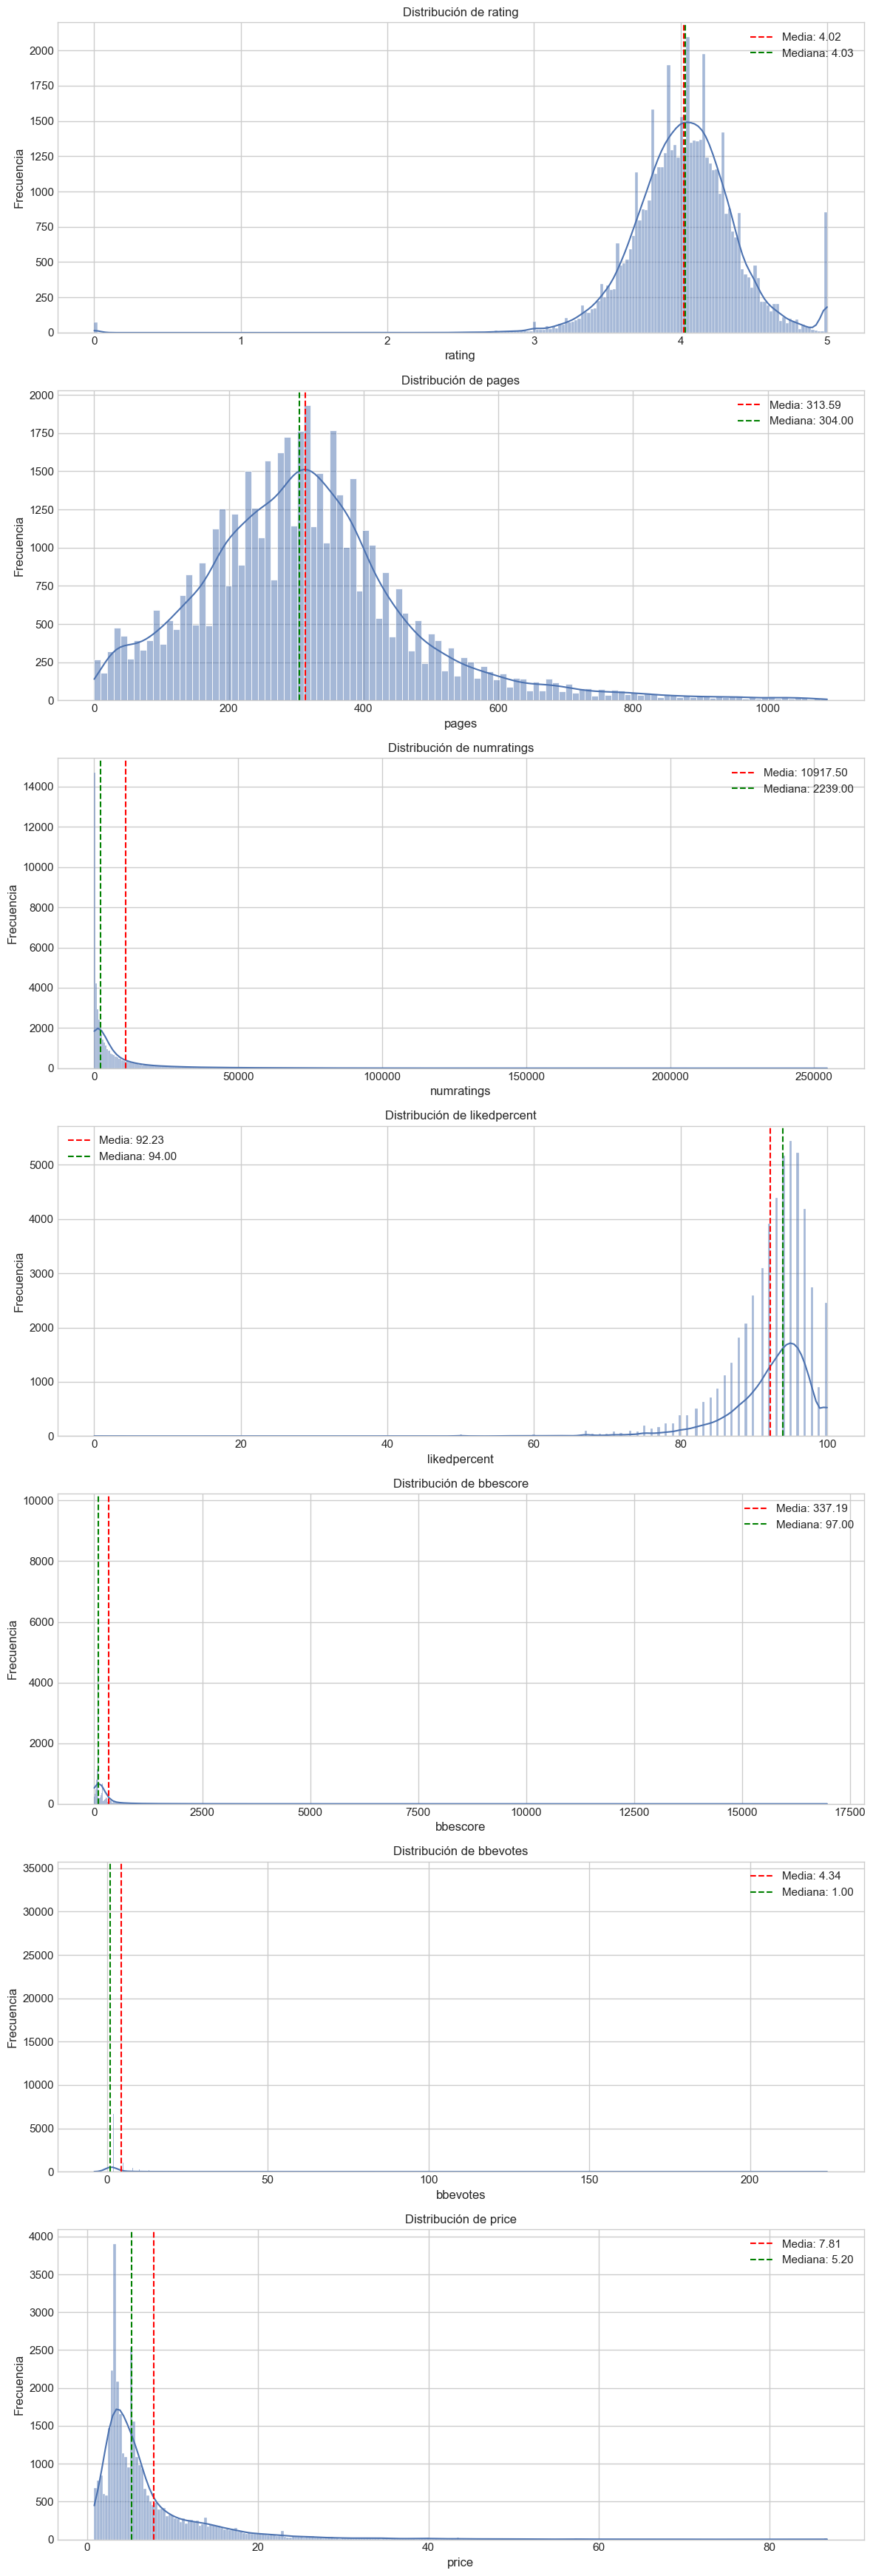

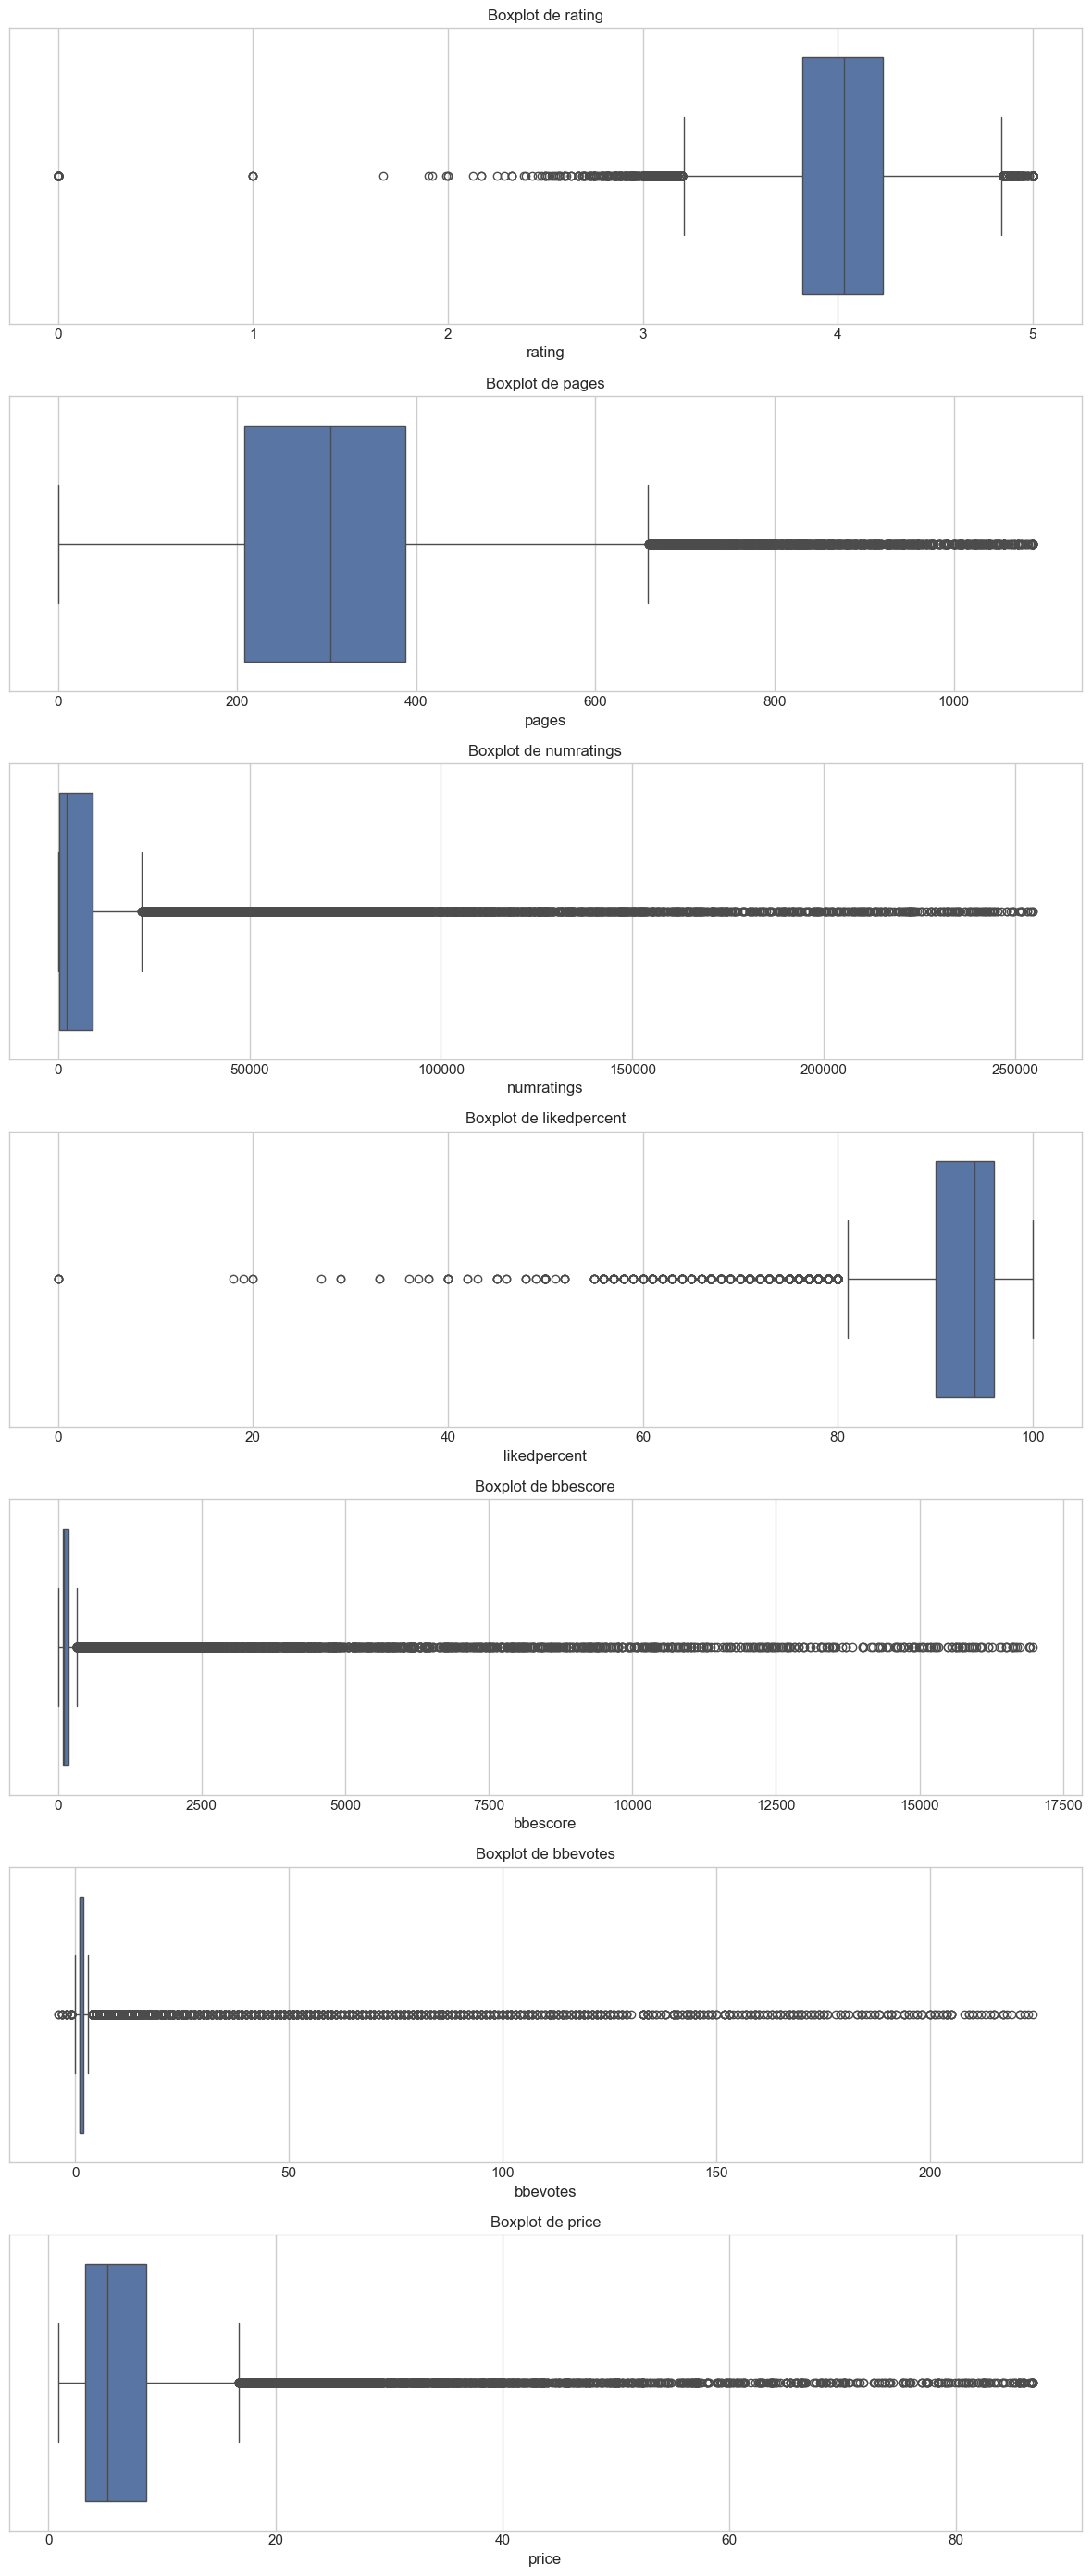

In [61]:

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Lista de variables numéricas
numeric_vars = ['rating', 'pages', 'numratings', 'likedpercent', 
                'bbescore', 'bbevotes', 'price']

# Verificar que las columnas existen y son numéricas
valid_numeric_vars = []
for var in numeric_vars:
    if var in books.columns:
        # Intentar convertir a numérico si no lo es
        if not pd.api.types.is_numeric_dtype(books[var]):
            try:
                books[var] = pd.to_numeric(books[var], errors='coerce')
                print(f"Columna '{var}' convertida a numérica")
            except:
                print(f"No se pudo convertir la columna '{var}' a numérica")
                continue
        valid_numeric_vars.append(var)
    else:
        print(f"La columna '{var}' no existe en el dataset")

# 1. Histogramas para cada variable numérica
if valid_numeric_vars:
    fig, axes = plt.subplots(len(valid_numeric_vars), 1, figsize=(12, 5*len(valid_numeric_vars)))
    if len(valid_numeric_vars) == 1:
        axes = [axes]  # Convertir a lista si solo hay una variable
    
    for i, var in enumerate(valid_numeric_vars):
        # Eliminar valores nulos y outliers extremos (percentil 99)
        data = books[var].dropna()
        if len(data) > 0:
            upper_limit = np.percentile(data, 99)
            data = data[data <= upper_limit]
            
            sns.histplot(data, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {var}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frecuencia')
            
            # Añadir líneas para media y mediana
            mean_val = data.mean()
            median_val = data.median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
            axes[i].legend()
    
    plt.tight_layout()
    plt.savefig('histogramas_variables_numericas.png', images_dir)
    plt.show()
else:
    print("No hay variables numéricas válidas para visualizar")

# 2. Boxplots para cada variable numérica
if valid_numeric_vars:
    fig, axes = plt.subplots(len(valid_numeric_vars), 1, figsize=(12, 4*len(valid_numeric_vars)))
    if len(valid_numeric_vars) == 1:
        axes = [axes]  # Convertir a lista si solo hay una variable
    
    for i, var in enumerate(valid_numeric_vars):
        # Eliminar valores nulos y outliers extremos
        data = books[var].dropna()
        if len(data) > 0:
            upper_limit = np.percentile(data, 99)
            data = data[data <= upper_limit]
            
            sns.boxplot(x=data, ax=axes[i])
            axes[i].set_title(f'Boxplot de {var}')
            axes[i].set_xlabel(var)
    
    plt.tight_layout()
    plt.savefig('boxplots_variables_numericas.png', images_dir)
    plt.show()

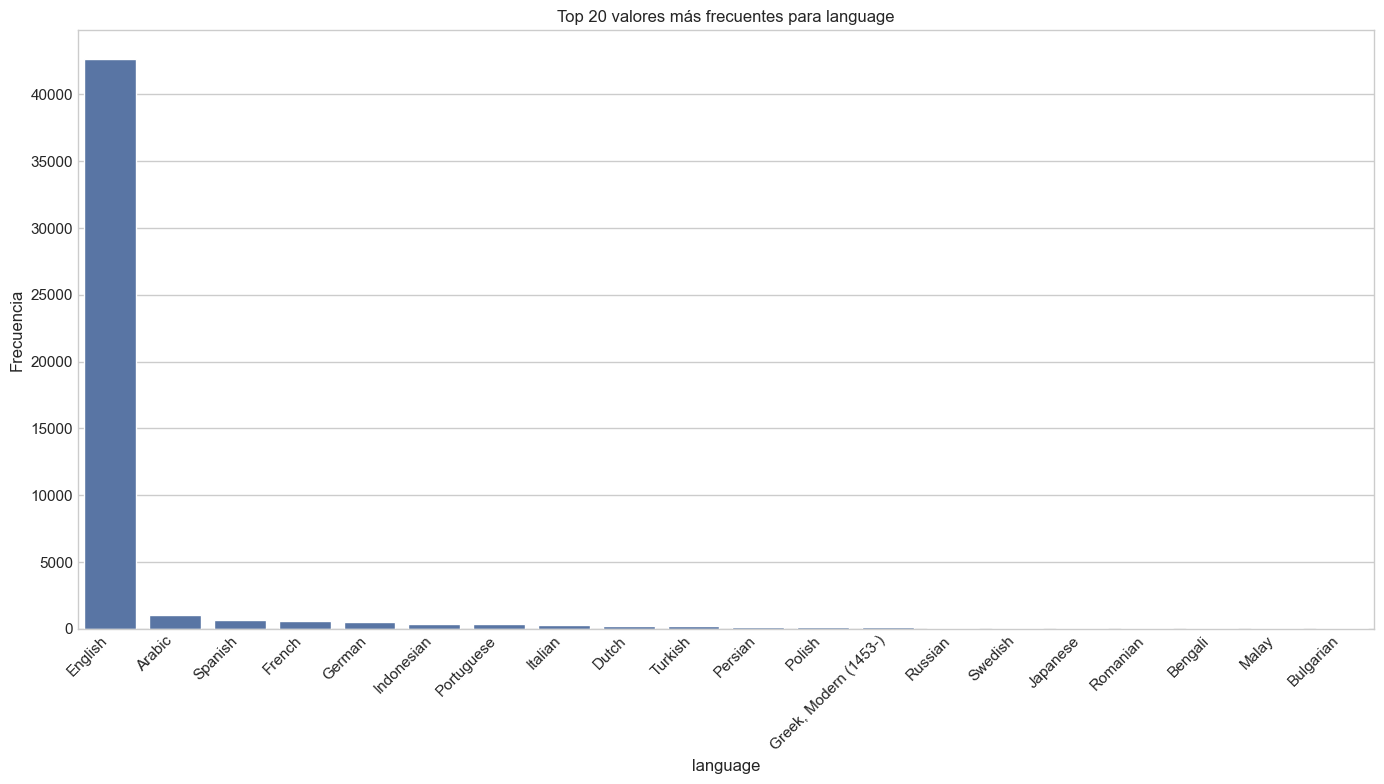

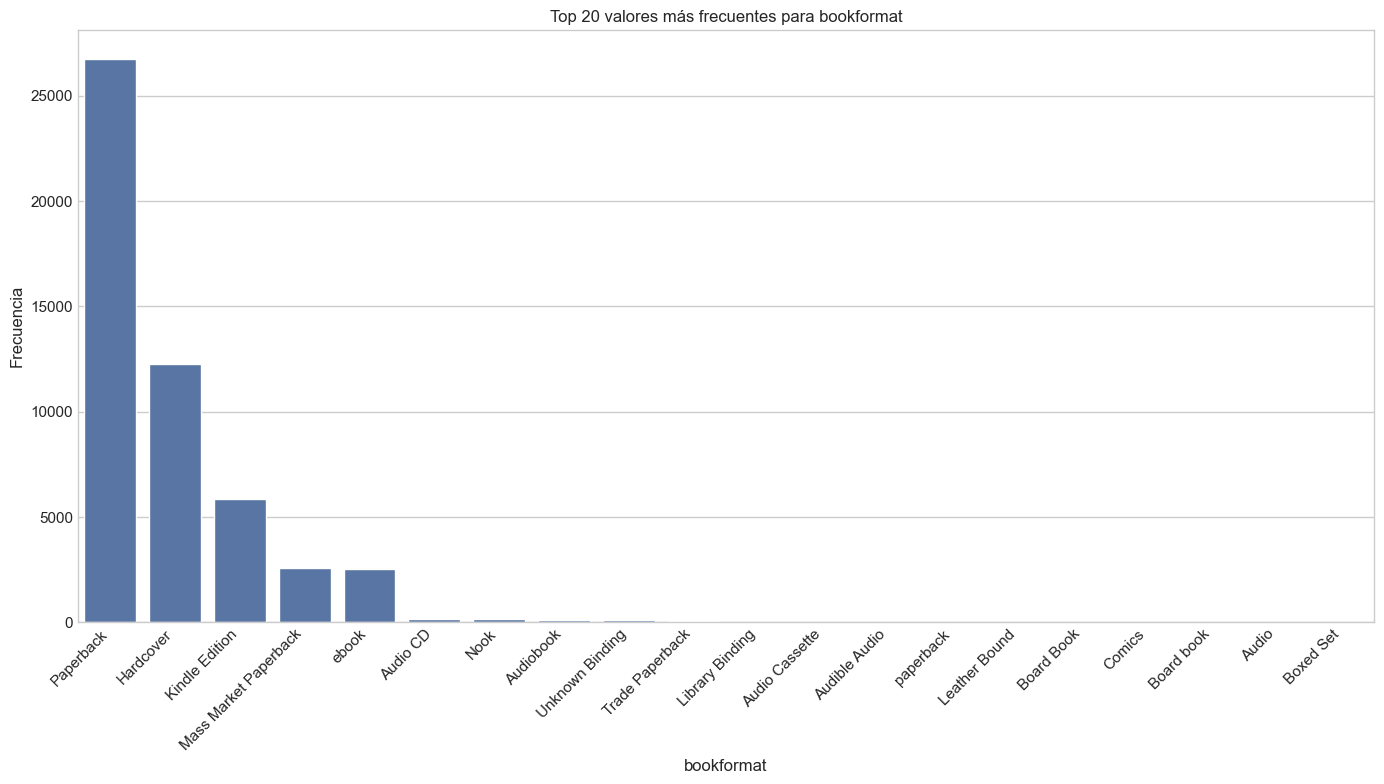

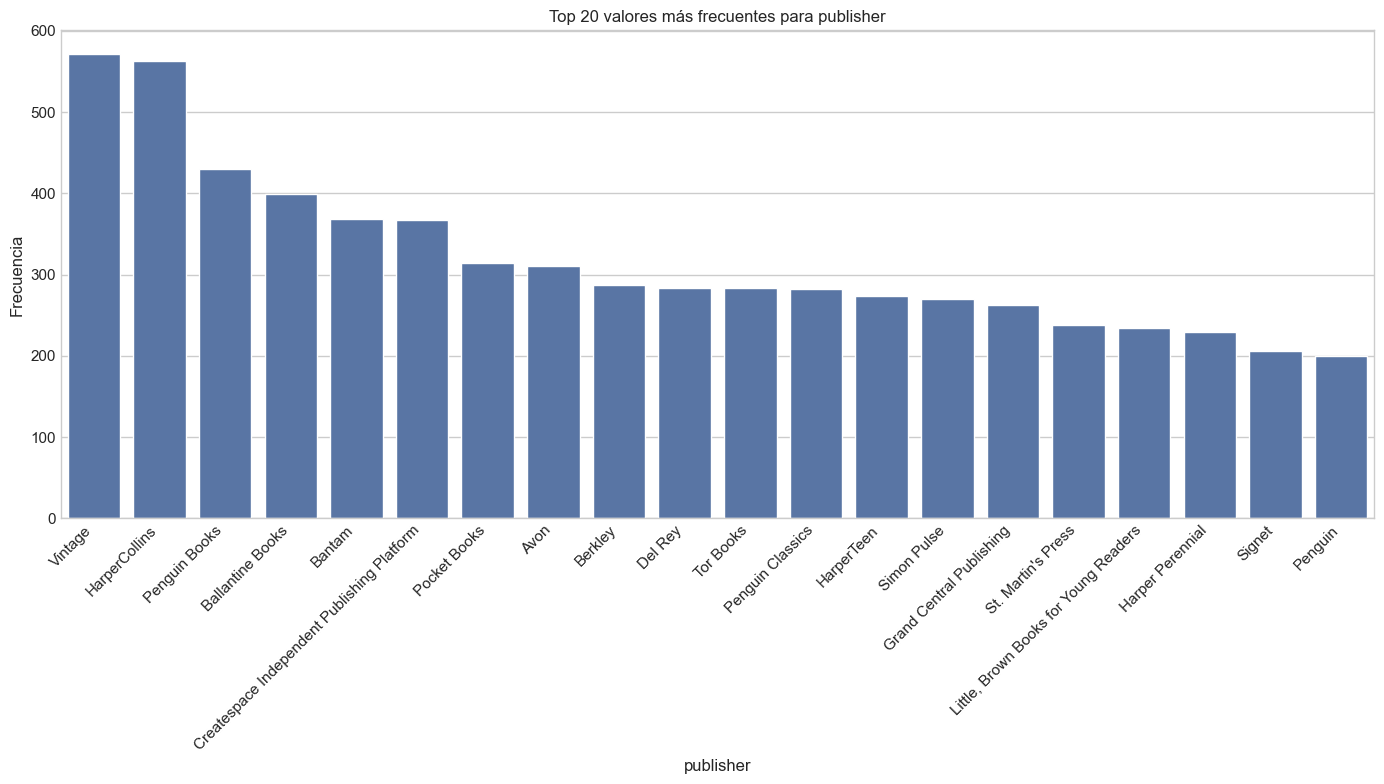

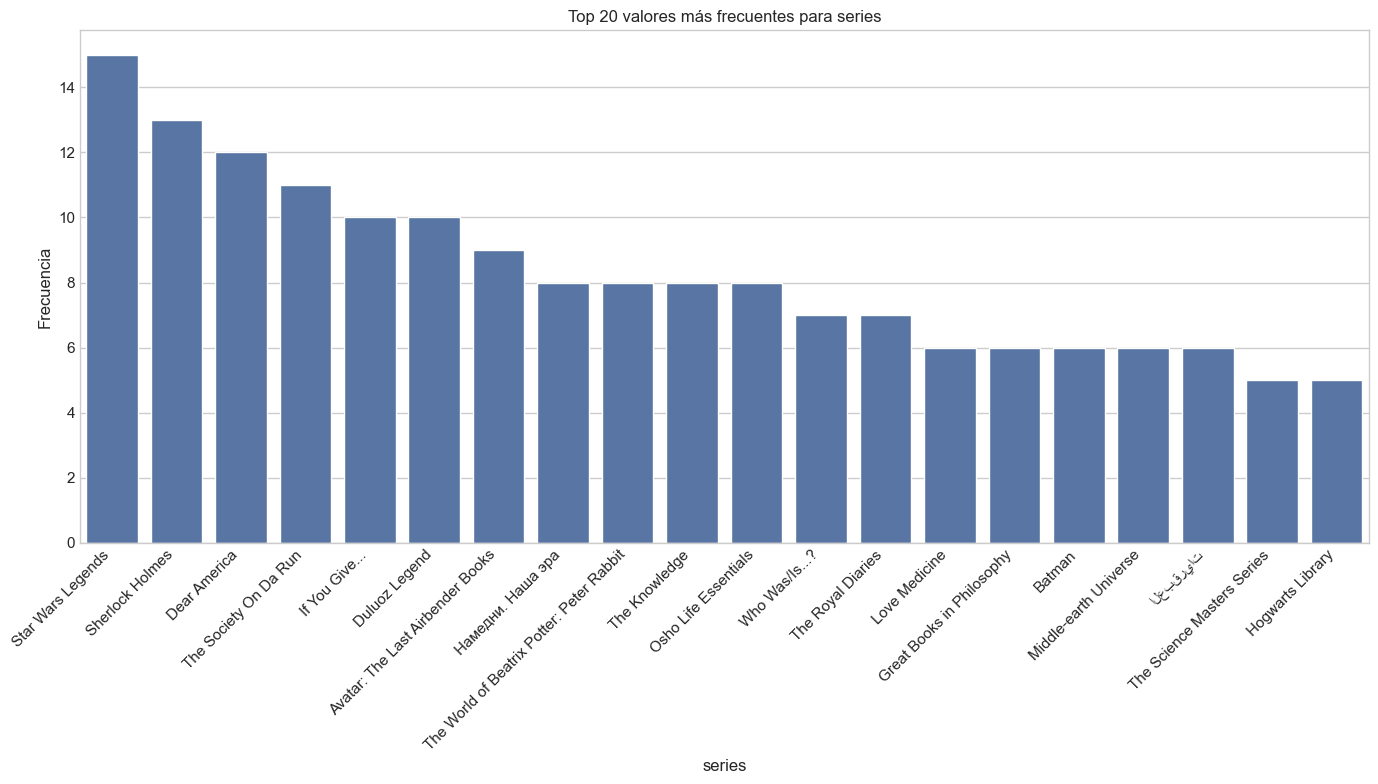

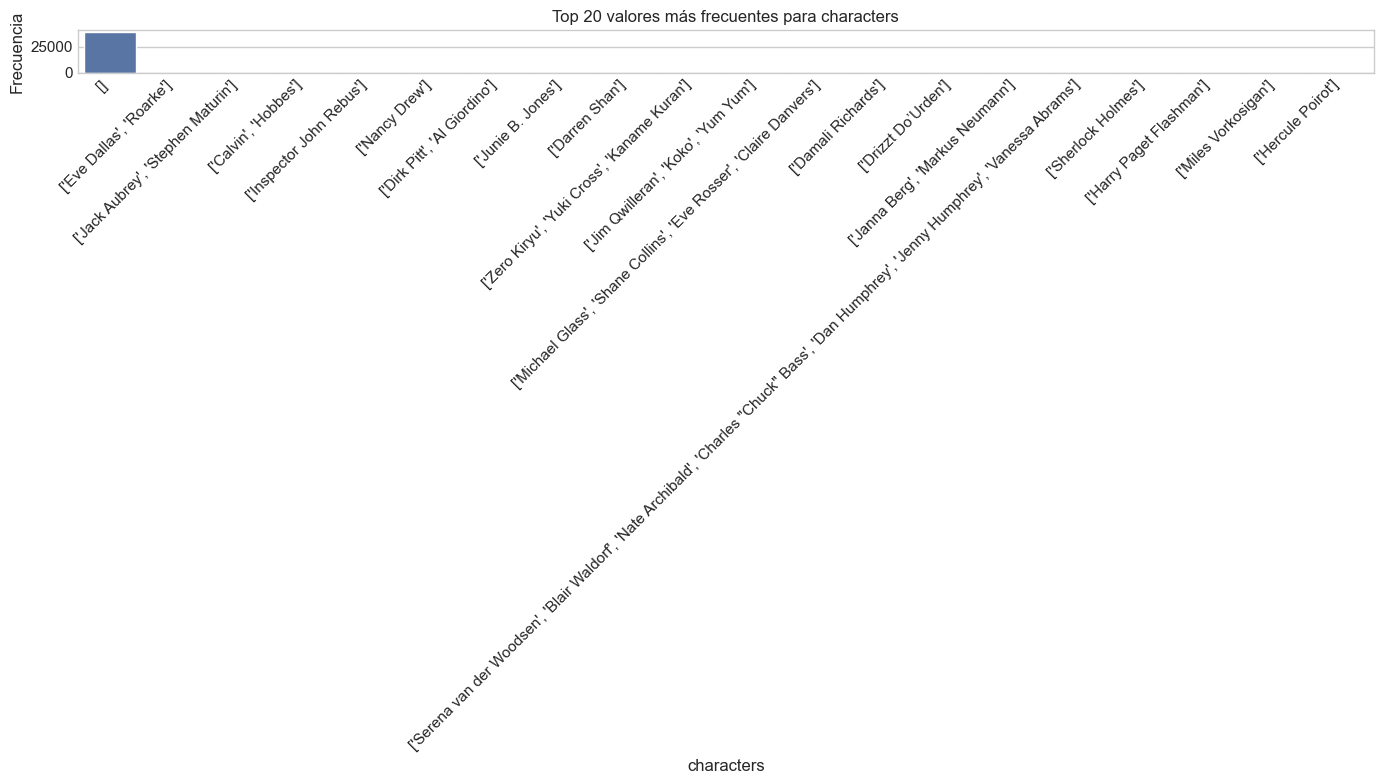

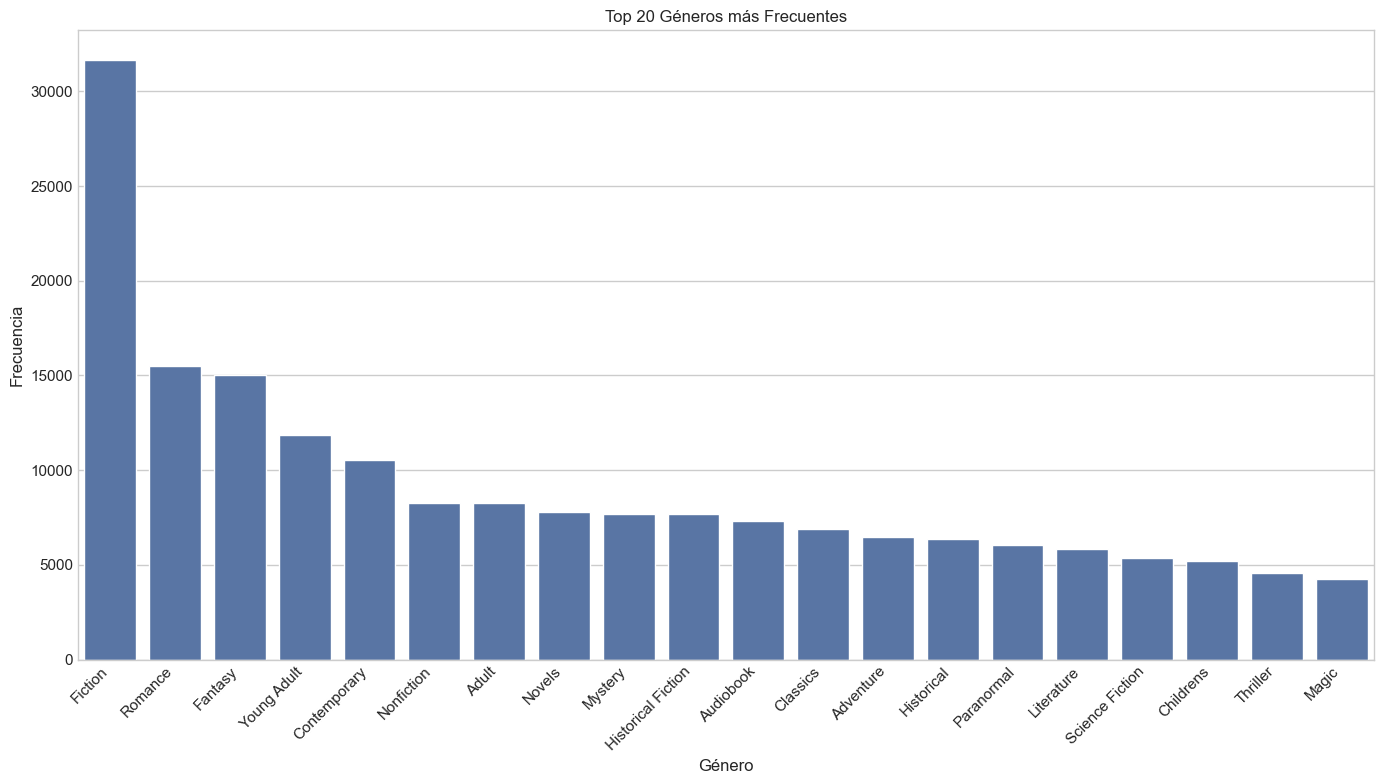

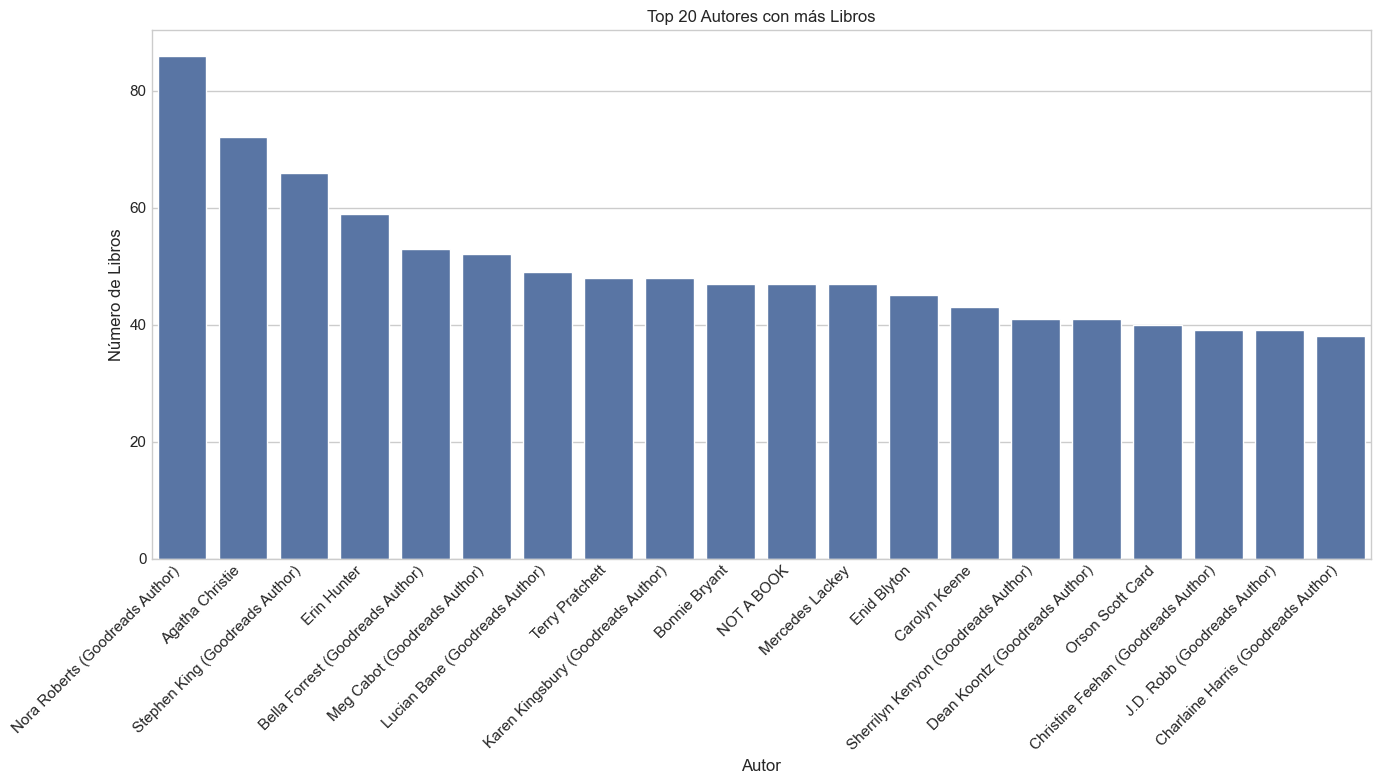

In [62]:
# Lista de variables categóricas
categorical_vars = ['language', 'bookformat', 'publisher', 'series', 'characters']

# Verificar que las columnas existen
valid_categorical_vars = [var for var in categorical_vars if var in books.columns]

if not valid_categorical_vars:
    print("No se encontraron variables categóricas válidas")
else:
    # 1. Gráficos de barras para variables categóricas
    for var in valid_categorical_vars:
        plt.figure(figsize=(14, 8))
        
        # Obtener los 20 valores más frecuentes, excluyendo valores nulos
        value_counts = books[var].dropna().value_counts().head(20)
        
        if len(value_counts) > 0:
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f'Top 20 valores más frecuentes para {var}')
            plt.xlabel(var)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(f'barplot_{var}.png', images_dir)
            plt.show()
        else:
            print(f"No hay datos suficientes para visualizar la variable '{var}'")

# 2. Análisis de géneros (con manejo de errores mejorado)
if 'genres' in books.columns:
    all_genres = []
    for genres_list in books['genres'].dropna():
        try:
            # Convertir la cadena de texto a lista
            if isinstance(genres_list, str):
                genres = eval(genres_list)
                if isinstance(genres, list):
                    all_genres.extend(genres)
        except:
            continue
    
    if all_genres:
        # Contar frecuencia de cada género
        genre_counts = pd.Series(all_genres).value_counts().head(20)
        
        plt.figure(figsize=(14, 8))
        sns.barplot(x=genre_counts.index, y=genre_counts.values)
        plt.title('Top 20 Géneros más Frecuentes')
        plt.xlabel('Género')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('barplot_genres.png')
        plt.show()
    else:
        print("No se pudieron extraer géneros del dataset")
else:
    print("La columna 'genres' no existe en el dataset")

# 3. Análisis de autores más frecuentes
if 'author' in books.columns:
    author_counts = books['author'].dropna().value_counts().head(20)
    
    if len(author_counts) > 0:
        plt.figure(figsize=(14, 8))
        sns.barplot(x=author_counts.index, y=author_counts.values)
        plt.title('Top 20 Autores con más Libros')
        plt.xlabel('Autor')
        plt.ylabel('Número de Libros')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('barplot_authors.png')
        plt.show()
    else:
        print("No hay datos suficientes de autores para visualizar")
else:
    print("La columna 'author' no existe en el dataset")

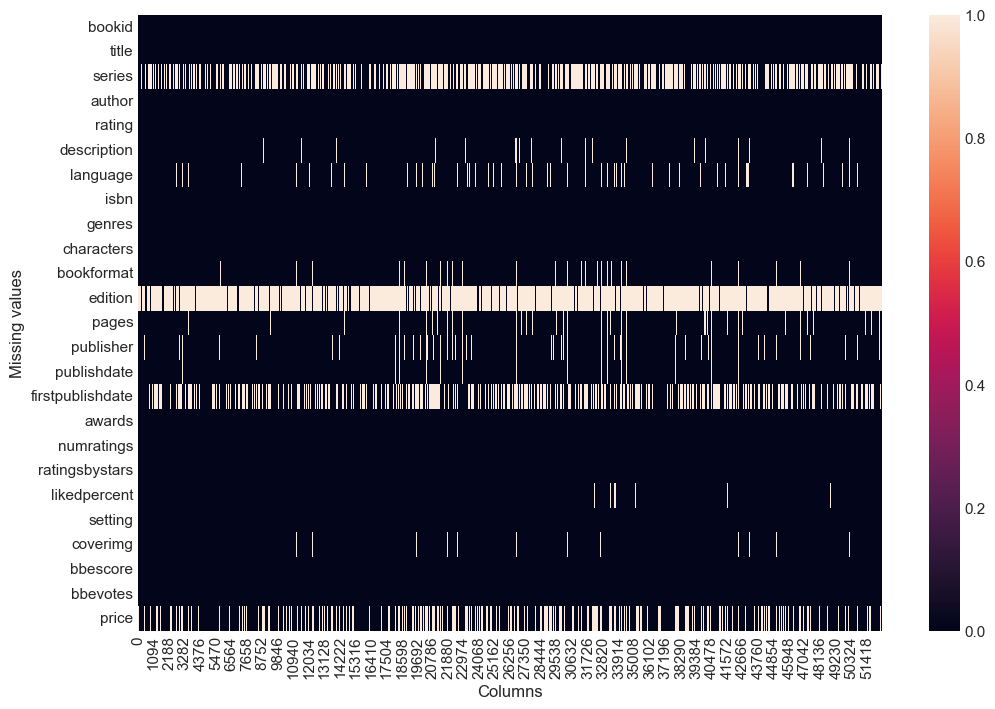

In [64]:
#Heatmap of missing values to see which columns have the most missing values
#This is useful to know which columns to drop or impute and if there are any patterns in the missing values
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [65]:
# series not be dropped because is interesting to know if the book is part of a series
#Replacing nulls in 'series' with 'Not part of a series'
books['series'].fillna('Not part of a series', inplace=True)

C:\Users\ivang\AppData\Local\Temp\ipykernel_31948\1369948259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['series'].fillna('Not part of a series', inplace=True)


In [66]:
# Dropping columns that has too many missing values and will not be useful for the analysis
books = books.drop(['edition', 'firstpublishdate'], axis=1)
books.columns.tolist()

['bookid',
 'title',
 'series',
 'author',
 'rating',
 'description',
 'language',
 'isbn',
 'genres',
 'characters',
 'bookformat',
 'pages',
 'publisher',
 'publishdate',
 'awards',
 'numratings',
 'ratingsbystars',
 'likedpercent',
 'setting',
 'coverimg',
 'bbescore',
 'bbevotes',
 'price']

In [67]:
#Replacing nulls in 'coverimg' with 'No cover available'
books['coverimg'].fillna('No cover available', inplace=True)

C:\Users\ivang\AppData\Local\Temp\ipykernel_31948\47487624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['coverimg'].fillna('No cover available', inplace=True)


In [68]:
# We use this to convert the price column to a float
books['price'] = pd.to_numeric(books['price'].astype(str).str.replace(',', '.', regex=False), errors='coerce')
books['price']


0        5.09
1        7.38
2         NaN
3         NaN
4        2.10
         ... 
52473     NaN
52474     NaN
52475    7.37
52476    2.86
52477    5.20
Name: price, Length: 52478, dtype: float64

In [69]:
null_percentage = books['price'].isna().mean() * 100
null_percentage

np.float64(27.396242234841267)

In [70]:
price_stats = books['price'].describe()
price_stats

count    38101.000000
mean         9.657241
std         24.297213
min          0.840000
25%          3.240000
50%          5.200000
75%          8.860000
max        898.640000
Name: price, dtype: float64

Estadísticas descriptivas de los precios:
count    38101.000000
mean         9.657241
std         24.297213
min          0.840000
25%          3.240000
50%          5.200000
75%          8.860000
max        898.640000
Name: price, dtype: float64


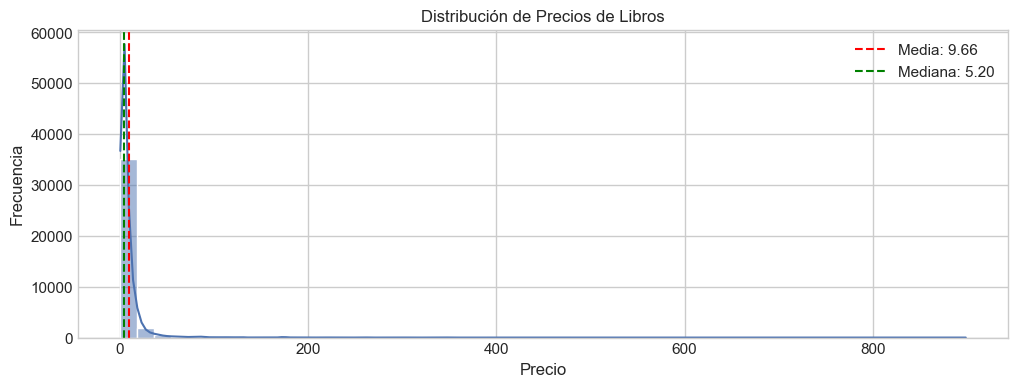

In [71]:
# Estadísticas descriptivas de la columna price
price_stats = books['price'].describe()
print("Estadísticas descriptivas de los precios:")
print(price_stats)

# Visualizar la distribución de precios
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.histplot(books['price'].dropna(), bins=50, kde=True)
plt.title('Distribución de Precios de Libros')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.axvline(books['price'].mean(), color='red', linestyle='--', label=f'Media: {books["price"].mean():.2f}')
plt.axvline(books['price'].median(), color='green', linestyle='--', label=f'Mediana: {books["price"].median():.2f}')
plt.legend()
plt.show()

In [72]:
# 1. Imputation with the median (less sensitive to outliers)
books['price'] = books['price'].fillna(books['price'].median())
books['price']

# This could be any other good option to impute the price through assuming that the price is related to the book format
#if 'bookformat' in books.columns:
    #median_by_format = books.groupby('bookformat')['price'].median()
    #books_imputed['price_by_format'] = books.apply(
        #lambda x: median_by_format.get(x['bookformat'])
        #if pd.isna(x['price']) else x['price'], axis=1)

0        5.09
1        7.38
2        5.20
3        5.20
4        2.10
         ... 
52473    5.20
52474    5.20
52475    7.37
52476    2.86
52477    5.20
Name: price, Length: 52478, dtype: float64

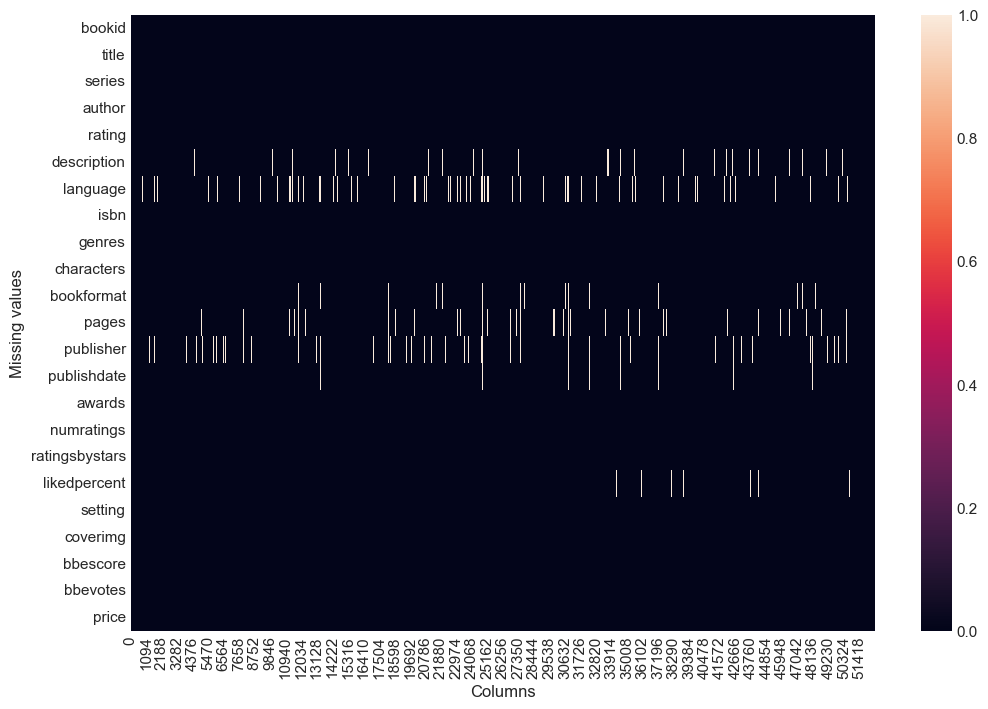

In [73]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

Checking duplicates in ISBN and title
First we quit ISBN duplicated because is unique, but they can have same title

In [74]:
# Análisis de valores únicos en la columna isbn
valores_unicos = books['isbn'].nunique()
total_registros = len(books)
duplicados = total_registros - valores_unicos

print(f"Total de registros: {total_registros}")
print(f"Valores únicos de ISBN: {valores_unicos}")
print(f"Número de registros duplicados: {duplicados}")

# Obtener la distribución de frecuencias de los valores de isbn
distribucion_isbn = books['isbn'].value_counts()

# Mostrar cuántos ISBNs aparecen más de una vez
isbn_repetidos = distribucion_isbn[distribucion_isbn > 1]
print(f"\nNúmero de ISBNs que aparecen más de una vez: {len(isbn_repetidos)}")

# Mostrar los ISBNs más repetidos
print("\nLos ISBNs más repetidos:")
print(isbn_repetidos.head(10))

# Verificar el ISBN sospechoso
print(f"\nEl ISBN '9999999999999' aparece {distribucion_isbn['9999999999999']} veces")

# Identificar los ISBNs duplicados genuinos (excluyendo el valor predeterminado)
isbn_duplicados_genuinos = isbn_repetidos[isbn_repetidos.index != '9999999999999']
print(f"\nNúmero de ISBNs duplicados genuinos: {len(isbn_duplicados_genuinos)}")

# Solución recomendada
books_final = books.copy()

# Generar IDs únicos para los libros con ISBN predeterminado
mask_default = books_final['isbn'] == '9999999999999'
books_final.loc[mask_default, 'isbn'] = 'NO_ISBN_' + books_final.loc[mask_default].index.astype(str)

# Identificar registros con ISBNs duplicados genuinos
mask_duplicados = books_final['isbn'].isin(isbn_duplicados_genuinos.index)

# Mantener todos los registros pero marcar los duplicados
books_final['is_duplicate'] = books_final.duplicated(subset=['isbn'], keep='first')

# replace default isbn with NO_ISBN_ and delete the column is_duplicate
books = books_final[~books_final['is_duplicate']].copy()

print(f"Registros con ISBN predeterminado: {mask_default.sum()}")
print(f"Registros con ISBN duplicado genuino: {mask_duplicados.sum()}")
print(f"Registros marcados como duplicados: {books_final['is_duplicate'].sum()}")
print(f"Total de registros después del procesamiento: {len(books)}")

Total de registros: 52478
Valores únicos de ISBN: 48072
Número de registros duplicados: 4406

Número de ISBNs que aparecen más de una vez: 54

Los ISBNs más repetidos:
isbn
9999999999999    4354
9780765326355       2
9780312429980       2
9781250166548       2
9780764208096       2
9781407105918       2
B00O84Q7UG          2
9783867196727       2
9500704919          2
9788402067074       2
Name: count, dtype: int64

El ISBN '9999999999999' aparece 4354 veces

Número de ISBNs duplicados genuinos: 53
Registros con ISBN predeterminado: 4354
Registros con ISBN duplicado genuino: 106
Registros marcados como duplicados: 53
Total de registros después del procesamiento: 52425


In [75]:
# Análisis de títulos duplicados
titulos_duplicados = books['title'].duplicated(keep=False)
print(f"Número de libros con títulos duplicados: {titulos_duplicados.sum()}")

# Identificar grupos de libros con el mismo título
grupos_titulos = books[titulos_duplicados].groupby('title')
print(f"Número de títulos duplicados únicos: {len(grupos_titulos)}")

# Mostrar algunos ejemplos de títulos duplicados
print("\nEjemplos de títulos duplicados:")
for titulo, grupo in list(grupos_titulos)[:5]:  # Mostrar los primeros 5 grupos
    print(f"\nTítulo: '{titulo}' - {len(grupo)} ocurrencias")
    print(grupo[['isbn', 'author', 'publisher']].head())

# Identificar libros con mismo título pero diferente ISBN
mismo_titulo_diferente_isbn = books[titulos_duplicados].copy()
mismo_titulo_diferente_isbn['isbn_duplicado'] = mismo_titulo_diferente_isbn.duplicated(subset=['title', 'isbn'], keep=False)

# Contar cuántos tienen el mismo título y mismo ISBN
mismo_titulo_mismo_isbn = mismo_titulo_diferente_isbn[mismo_titulo_diferente_isbn['isbn_duplicado']]
print(f"\nLibros con mismo título y mismo ISBN: {len(mismo_titulo_mismo_isbn)}")

# Eliminar duplicados de título+ISBN (manteniendo el primero)
books_limpio = books.copy()
duplicados_a_eliminar = books_limpio.duplicated(subset=['title', 'isbn'], keep='first')
books_limpio = books_limpio[~duplicados_a_eliminar].copy()

print(f"\nRegistros originales: {len(books)}")
print(f"Registros después de eliminar duplicados de título+ISBN: {len(books_limpio)}")
print(f"Registros eliminados: {len(books) - len(books_limpio)}")

# Actualizar la variable books
books = books_limpio.copy()

# Verificar que no quedan duplicados de título+ISBN
duplicados_restantes = books.duplicated(subset=['title', 'isbn'], keep=False)
print(f"Duplicados de título+ISBN restantes: {duplicados_restantes.sum()}")

# Verificar cuántos títulos duplicados quedan (con diferentes ISBNs)
titulos_duplicados_restantes = books['title'].duplicated(keep=False)
print(f"Títulos duplicados restantes (con diferentes ISBNs): {titulos_duplicados_restantes.sum()}")

Número de libros con títulos duplicados: 4118
Número de títulos duplicados únicos: 1620

Ejemplos de títulos duplicados:

Título: ''Salem's Lot' - 2 ocurrencias
               isbn                                             author  \
385   9780450031069                    Stephen King (Goodreads Author)   
3674  9780385516488  Stephen King (Goodreads Author), Jerry N. Uels...   

                publisher  
385   New English Library  
3674            Doubleday  

Título: ''Til Death' - 2 ocurrencias
                isbn                          author       publisher
27557  9781416589884       Miasha (Goodreads Author)      Touchstone
48062  9780778314271  Sharon Sala (Goodreads Author)  Harlequin MIRA

Título: '1919' - 3 ocurrencias
                isbn                                        author  \
10578  9789770932926                  أحمد مراد (Goodreads Author)   
11569  9780618056828  John Dos Passos, E.L. Doctorow (Foreword by)   
32466  NO_ISBN_32466                         

In [76]:
books['bookformat'].fillna('Unknown', inplace=True)
books['publisher'].fillna('Unknown', inplace=True)

C:\Users\ivang\AppData\Local\Temp\ipykernel_31948\2354032624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['bookformat'].fillna('Unknown', inplace=True)
C:\Users\ivang\AppData\Local\Temp\ipykernel_31948\2354032624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [77]:
books[books['publishdate'].apply(pd.to_datetime, errors='coerce').notna()]
books['publishdate']

0                  09/14/08
1                  09/28/04
2                  05/23/06
3                  10/10/00
4                  09/06/06
                ...        
52473         May 28th 2011
52474       August 5th 2011
52475       March 18th 2011
52476    September 1st 2011
52477          May 8th 2011
Name: publishdate, Length: 52425, dtype: object

In [78]:
def standardize_dates(date):
    """
    Optimized function to convert dates, with emphasis on 'Month Day Year' format.
    """
    if pd.isna(date):
        return pd.NaT
    
    # Convert to string and clean
    date_str = str(date).strip()
    
    # If it's "Published" or empty, return NaT
    if date_str.lower() == 'published' or date_str == '':
        return pd.NaT
    
    # Check if it's a list of books or other text not related to dates
    if "books" in date_str.lower() or "\\n" in date_str:
        return pd.NaT
    
    # Dictionary of months
    months = {
        "january": 1, "february": 2, "march": 3, "april": 4, "may": 5, "june": 6,
        "july": 7, "august": 8, "september": 9, "october": 10, "november": 11, "december": 12
    }
    
    try:
        # CASE 1: Format MM/DD/YY or MM/DD/YYYY
        if '/' in date_str and len(date_str) <= 10:
            try:
                parts = date_str.split('/')
                if len(parts) == 3:
                    month, day, year = int(parts[0]), int(parts[1]), parts[2]
                    
                    # Add century if needed
                    if len(year) == 2:
                        year_int = int(year)
                        if year_int < 50:
                            year = '20' + year
                        else:
                            year = '19' + year
                    
                    return pd.to_datetime(f"{year}-{month:02d}-{day:02d}")
            except:
                pass
        
        # CASE 2: Only year (4 digits)
        if date_str.isdigit() and len(date_str) == 4:
            return pd.to_datetime(f"{date_str}-01-01")
        
        # CASE 3: Format "Month Day Year" (e.g.: "August 30th 2004")
        date_lower = date_str.lower()
        
        # Remove ordinal suffixes
        clean_date = date_lower
        for suffix in ['st', 'nd', 'rd', 'th']:
            clean_date = clean_date.replace(suffix, '')
        
        # Search for month in text
        found_month = None
        month_num = None
        
        for month, num in months.items():
            if month in date_lower:
                found_month = month
                month_num = num
                break
        
        if found_month:
            # Extract numbers from text
            import re
            numbers = re.findall(r'\d+', clean_date)
            
            if len(numbers) >= 2:  # We have at least day and year
                # Determine which is the day and which is the year
                if len(numbers[0]) <= 2 and int(numbers[0]) <= 31:  # Probably the day
                    day = int(numbers[0])
                    
                    # The year could be the second number
                    year = numbers[1]
                    if len(year) == 2:  # Two-digit year
                        year_int = int(year)
                        if year_int < 50:
                            year = '20' + year
                        else:
                            year = '19' + year
                    
                    return pd.to_datetime(f"{year}-{month_num:02d}-{day:02d}")
                
                elif len(numbers[1]) <= 2 and int(numbers[1]) <= 31:  # The second number is the day
                    day = int(numbers[1])
                    
                    # The year could be the first number
                    year = numbers[0]
                    if len(year) == 2:  # Two-digit year
                        year_int = int(year)
                        if year_int < 50:
                            year = '20' + year
                        else:
                            year = '19' + year
                    
                    return pd.to_datetime(f"{year}-{month_num:02d}-{day:02d}")
            
            elif len(numbers) == 1:  # We only have one number (probably the year)
                year = numbers[0]
                if len(year) == 2:  # Two-digit year
                    year_int = int(year)
                    if year_int < 50:
                        year = '20' + year
                    else:
                        year = '19' + year
                
                return pd.to_datetime(f"{year}-{month_num:02d}-01")  # Default to day 1
        
        # CASE 4: Specific format for "August 30th 2004" and similar
        for month, month_num in months.items():
            if month in date_lower:
                # Specific pattern for "Month Day Year"
                import re
                pattern = fr"{month}\s+(\d+)(?:st|nd|rd|th)?\s+(\d+)"
                match = re.search(pattern, date_lower)
                
                if match:
                    day = int(match.group(1))
                    year = match.group(2)
                    
                    # Add century if needed
                    if len(year) == 2:
                        year_int = int(year)
                        if year_int < 50:
                            year = '20' + year
                        else:
                            year = '19' + year
                    
                    return pd.to_datetime(f"{year}-{month_num:02d}-{day:02d}")
                
                # Pattern for "Month Year"
                pattern = fr"{month}\s+(\d+)"
                match = re.search(pattern, date_lower)
                
                if match:
                    year = match.group(1)
                    
                    # Add century if needed
                    if len(year) == 2:
                        year_int = int(year)
                        if year_int < 50:
                            year = '20' + year
                        else:
                            year = '19' + year
                    
                    return pd.to_datetime(f"{year}-{month_num:02d}-01")
        
        # CASE 5: Last attempt with general format
        try:
            return pd.to_datetime(date_str)
        except:
            # Try with specific format for dates with trailing spaces
            clean_date_str = date_str.strip()
            return pd.to_datetime(clean_date_str)
            
    except Exception as e:
        # print(f"Error processing date '{date_str}': {e}")
        return pd.NaT

# Save original dates for reference
books['original_publishdate'] = books['publishdate']

# Apply the optimized function
books['publishdate'] = books['publishdate'].apply(standardize_dates)

# Verify results
total_dates = len(books)
converted_dates = books['publishdate'].notna().sum()
percentage = (converted_dates / total_dates) * 100

print(f"Total dates: {total_dates}")
print(f"Successfully converted dates: {converted_dates} ({percentage:.2f}%)")

# Identify dates that couldn't be converted
unconverted_dates = books[books['publishdate'].isna()]
print(f"\nTotal unconverted dates: {len(unconverted_dates)}")

# Show a sample of unconverted dates with their original values
print("\nSample of unconverted dates (original values):")
print(unconverted_dates['original_publishdate'].sample(10).to_frame())

# Optional: If you want to remove rows with unconverted dates
# books = books.dropna(subset=['publishdate'])
# print(f"\nRemaining rows after removing unconverted dates: {len(books)}")

# Remove the temporary column after we're done
books.drop('original_publishdate', axis=1, inplace=True)

Total dates: 52425
Successfully converted dates: 50666 (96.64%)

Total unconverted dates: 1759

Sample of unconverted dates (original values):
                                    original_publishdate
19065                                                NaN
14183                                          Published
38199                                                NaN
37152                                                NaN
39961          Anarchist books\n\n405 books — 328 voters
22204                                          Published
26545                                                NaN
30778                                                NaN
43564  UtopYA Con 2013\n\n217 books — 274 voters\nAnt...
34927                                          Published


In [79]:
books

bookid  \
0                         2767052-the-hunger-games   
1      2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                       2657.To_Kill_a_Mockingbird   
3                         1885.Pride_and_Prejudice   
4                                   41865.Twilight   
...                                            ...   
52473                           11492014-fractured   
52474                             11836711-anasazi   
52475                              10815662-marked   
52476                         11330278-wayward-son   
52477                 10991547-daughter-of-helaman   

                                           title                 series  \
0                               The Hunger Games    The Hunger Games #1   
1      Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                          To Kill a Mockingbird  To Kill a Mockingbird   
3                            Pride and Prejudice   Not part of a series   
4                                       Twilight   The Twilight Saga #1   
...                                          ...                    ...   
52473                                  Fractured             Fateful #2   
52474                                    Anasazi      Sense of Truth #2   
52475                                     Marked      Soul Guardians #1   
52476                                Wayward Son   Not part of a series   
52477                        Daughter of Helaman   Stripling Warrior #1   

                                                  author  rating  \
0                                        Suzanne Collins    4.33   
1              J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                             Harper Lee    4.28   
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
4                                        Stephenie Meyer    3.60   
...                                                  ...     ...   
52473                   Cheri Schmidt (Goodreads Author)    4.00   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                                             description language  \
0      WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   
1      There is a door at the end of a silent corrido...  English   
2      The unforgettable novel of a childhood in a sl...  English   
3      Alternate cover edition of ISBN 9780679783268S...  English   
4      About three things I was absolutely positive.\...  English   
...                                                  ...      ...   
52473  The Fateful Trilogy continues with Fractured. ...  English   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...  English   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   
52477  Fighting in Helaman's army is Keturah's deepes...  English   

                isbn                                             genres  \
0      9780439023481  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1      9780439358071  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2          NO_ISBN_2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3          NO_ISBN_3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4      9780316015844  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   
...              ...                                                ...   
52473  2940012616562  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...   
52474  NO_ISBN_52474                         ['Mystery', 'Young Adult']   
52475  9781461017097  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...   
52476  9781450755634  ['Fiction', 'Mystery', 'Historical Fiction', '...   
52477  9781599554976  [

In [99]:
def count_awards(awards_str):
    if not awards_str or awards_str == "":
        return 0
    awards_list = eval(awards_str)
    return len(awards_list)
    
    
books['num_awards'] = books['awards'].apply(count_awards)


#splitting awards and creating a list of individual awards
awards_list = books['awards'].str.split(',').explode().str.strip()

#grouping by book and counting awards
books_with_awards = awards_list.groupby(awards_list).size().reset_index(name='num_awards')
books_most_awards = books_with_awards.nlargest(10, 'num_awards')
books_most_awards_details = pd.merge(books_most_awards, books[['title', 'awards']], left_on='awards', right_on='awards', how='left')
print("Books with the Most Awards:")
print(books_most_awards_details[['title', 'num_awards']])


#aggregate by author
authors_with_awards = books.groupby('author')['awards'].apply(lambda x: x.str.split(',').explode().str.strip().count()).reset_index(name='num_awards')
authors_most_awards = authors_with_awards.nlargest(10, 'num_awards')
print("\nAuthors with the Most Awards:")
print(authors_most_awards)

Books with the Most Awards:
                                                   title  num_awards
0                                    Pride and Prejudice       31477
1                               The Chronicles of Narnia       31477
2      J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...       31477
3                   The Hitchhiker's Guide to the Galaxy       31477
4                                        The Giving Tree       31477
...                                                  ...         ...
31544                                     Born of Legend          13
31545                                      Beard Science          13
31546                                   Blackwing Dragon          13
31547                                           RoomHate          13
31548                                      The Obsession          13

[31549 rows x 2 columns]

Authors with the Most Awards:
                                          author  num_awards
19060            Stephen K

In [81]:
#First (after many tests) let's make sure all values are treated as strings and replace None with '[]' 
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: str(x) if x is not None else '[]')

#Then remove the square brackets and split the string into a list of ratings
books['ratingsbystars'] = books['ratingsbystars'].str.strip('[]').str.replace("'", "").str.split(',')

#Changing empty strings or None with '0'
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: ['0' if elem.strip() == '' else elem.strip() for elem in x])

#Each list has to have 5 elements (5 ratings)
books['ratingsbystars'] = books['ratingsbystars'].apply(lambda x: x + ['0'] * (5 - len(x)) if len(x) < 5 else x)

#Creating new columns
ratings_df = pd.DataFrame(books['ratingsbystars'].tolist(), index=books.index, columns=['5_star', '4_star', '3_star', '2_star', '1_star'])

#Changing type!
ratings_df = ratings_df.astype(int)

#Merge the new columns back
books = books.drop(columns=['ratingsbystars'])
books = pd.concat([books, ratings_df], axis=1)

numeric_vars.append(['5_star', '4_star', '3_star', '2_star', '1_star'])

print(books.dtypes)

bookid                  object
title                   object
series                  object
author                  object
rating                 float64
description             object
language                object
isbn                    object
genres                  object
characters              object
bookformat              object
pages                  float64
publisher               object
publishdate     datetime64[ns]
awards                  object
numratings               int64
likedpercent           float64
setting                 object
coverimg                object
bbescore                 int64
bbevotes                 int64
price                  float64
is_duplicate              bool
num_awards               int64
5_star                   int64
4_star                   int64
3_star                   int64
2_star                   int64
1_star                   int64
dtype: object


In [82]:
# Procesamiento de la columna "genres"
# Primero, veamos cómo se ve la columna actualmente
print("Ejemplo de la columna 'genres':")
print(books['genres'].head())

# La columna parece contener listas como strings, vamos a convertirlas en listas reales
books['genres_list'] = books['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Veamos cuántos géneros únicos hay
all_genres = []
for genres in books['genres_list']:
    all_genres.extend(genres)
    
unique_genres = set(all_genres)
print(f"Número de géneros únicos: {len(unique_genres)}")

# Veamos los géneros más comunes
from collections import Counter
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(20)
print("\nLos 20 géneros más comunes:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

# Seleccionamos los géneros más comunes (por ejemplo, los que aparecen al menos 1000 veces)
min_count = 1000
common_genres = [genre for genre, count in genre_counts.items() if count >= min_count]
print(f"\nNúmero de géneros comunes (con al menos {min_count} apariciones): {len(common_genres)}")

# Creamos columnas dummy para los géneros más comunes
for genre in common_genres:
    books[f'genre_{genre}'] = books['genres_list'].apply(lambda x: 1 if genre in x else 0)

# Verificamos las nuevas columnas
genre_columns = [col for col in books.columns if col.startswith('genre_')]
print(f"\nSe han creado {len(genre_columns)} columnas de géneros")
print("Primeras 5 columnas de géneros:", genre_columns[:5])

# Veamos un ejemplo de cómo quedaron las columnas para un libro
sample_book = books.iloc[0]
print(f"\nGéneros del libro '{sample_book['title']}':")
print(f"Géneros originales: {sample_book['genres_list']}")
for col in genre_columns:
    if sample_book[col] == 1:
        print(f"- {col.replace('genre_', '')}")

Ejemplo de la columna 'genres':
0    ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1    ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2    ['Classics', 'Fiction', 'Historical Fiction', ...
3    ['Classics', 'Fiction', 'Romance', 'Historical...
4    ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
Name: genres, dtype: object
Número de géneros únicos: 982

Los 20 géneros más comunes:
Fiction: 31601
Romance: 15481
Fantasy: 15032
Young Adult: 11857
Contemporary: 10508
Nonfiction: 8244
Adult: 8238
Novels: 7796
Mystery: 7691
Historical Fiction: 7656
Audiobook: 7299
Classics: 6897
Adventure: 6444
Historical: 6378
Paranormal: 6028
Literature: 5830
Science Fiction: 5367
Childrens: 5223
Thriller: 4581
Magic: 4245

Número de géneros comunes (con al menos 1000 apariciones): 77

Se han creado 77 columnas de géneros
Primeras 5 columnas de géneros: ['genre_Young Adult', 'genre_Fiction', 'genre_Dystopia', 'genre_Fantasy', 'genre_Science Fiction']

Géneros del libro 'The Hunger Games':
Géneros

In [83]:
books

bookid  \
0                         2767052-the-hunger-games   
1      2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                       2657.To_Kill_a_Mockingbird   
3                         1885.Pride_and_Prejudice   
4                                   41865.Twilight   
...                                            ...   
52473                           11492014-fractured   
52474                             11836711-anasazi   
52475                              10815662-marked   
52476                         11330278-wayward-son   
52477                 10991547-daughter-of-helaman   

                                           title                 series  \
0                               The Hunger Games    The Hunger Games #1   
1      Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                          To Kill a Mockingbird  To Kill a Mockingbird   
3                            Pride and Prejudice   Not part of a series   
4                                       Twilight   The Twilight Saga #1   
...                                          ...                    ...   
52473                                  Fractured             Fateful #2   
52474                                    Anasazi      Sense of Truth #2   
52475                                     Marked      Soul Guardians #1   
52476                                Wayward Son   Not part of a series   
52477                        Daughter of Helaman   Stripling Warrior #1   

                                                  author  rating  \
0                                        Suzanne Collins    4.33   
1              J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                             Harper Lee    4.28   
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
4                                        Stephenie Meyer    3.60   
...                                                  ...     ...   
52473                   Cheri Schmidt (Goodreads Author)    4.00   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                                             description language  \
0      WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English   
1      There is a door at the end of a silent corrido...  English   
2      The unforgettable novel of a childhood in a sl...  English   
3      Alternate cover edition of ISBN 9780679783268S...  English   
4      About three things I was absolutely positive.\...  English   
...                                                  ...      ...   
52473  The Fateful Trilogy continues with Fractured. ...  English   
52474  'Anasazi', sequel to 'The Thirteenth Chime' by...  English   
52475  --READERS FAVORITE AWARDS WINNER 2011--Sixteen...  English   
52476  A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...  English   
52477  Fighting in Helaman's army is Keturah's deepes...  English   

                isbn                                             genres  \
0      9780439023481  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   
1      9780439358071  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
2          NO_ISBN_2  ['Classics', 'Fiction', 'Historical Fiction', ...   
3          NO_ISBN_3  ['Classics', 'Fiction', 'Romance', 'Historical...   
4      9780316015844  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   
...              ...                                                ...   
52473  2940012616562  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...   
52474  NO_ISBN_52474                         ['Mystery', 'Young Adult']   
52475  9781461017097  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...   
52476  9781450755634  ['Fiction', 'Mystery', 'Historical Fiction', '...   
52477  9781599554976  [

In [84]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)

books["age_of_book"] = 2025 - books["publishdate"].dt.year
books["age_of_book"]

0        17.0
1        21.0
2        19.0
3        25.0
4        19.0
         ... 
52473    14.0
52474    14.0
52475    14.0
52476    14.0
52477    14.0
Name: age_of_book, Length: 52425, dtype: float64

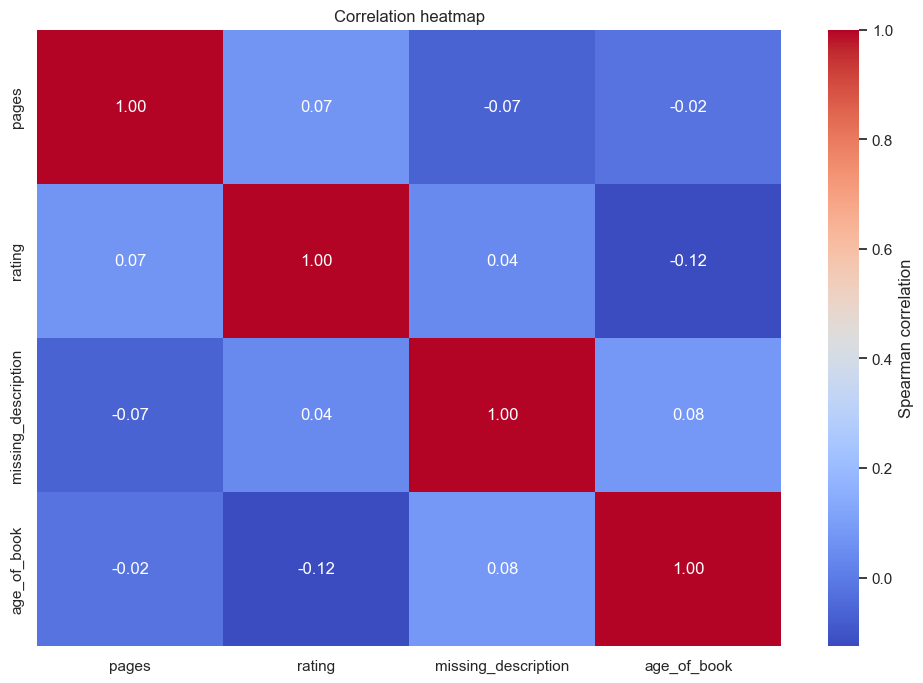

In [85]:
columns_of_interest = ["pages","rating","missing_description","age_of_book"]

#We use spearman correlation to handle the non-linear relationship between the variables
#pearson correlation is not suitable for this data because it assumes a linear relationship between the variables
correlation_matrix = books[columns_of_interest].corr(method="spearman")

#We do this to check if missing description is correlated with other variables to know if we should drop books with missing description
sns.set_theme(style="white")
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt = ".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()


In [86]:
books["pages"] = pd.to_numeric(books["pages"], errors="coerce")
total_books = len(books)

books_with_missing_values = books[(books["description"].isna()) |
                                  (books["pages"].isna()) |
                                  (books["rating"].isna())]

books_with_missing = len(books_with_missing_values)

percentage_missing = (books_with_missing / total_books) * 100

print(f"Número total de libros: {total_books}")
print(f"Número de libros con valores faltantes: {books_with_missing}")
print(f"Porcentaje de libros con valores faltantes: {percentage_missing:.2f}%")

Número total de libros: 52425
Número de libros con valores faltantes: 3376
Porcentaje de libros con valores faltantes: 6.44%


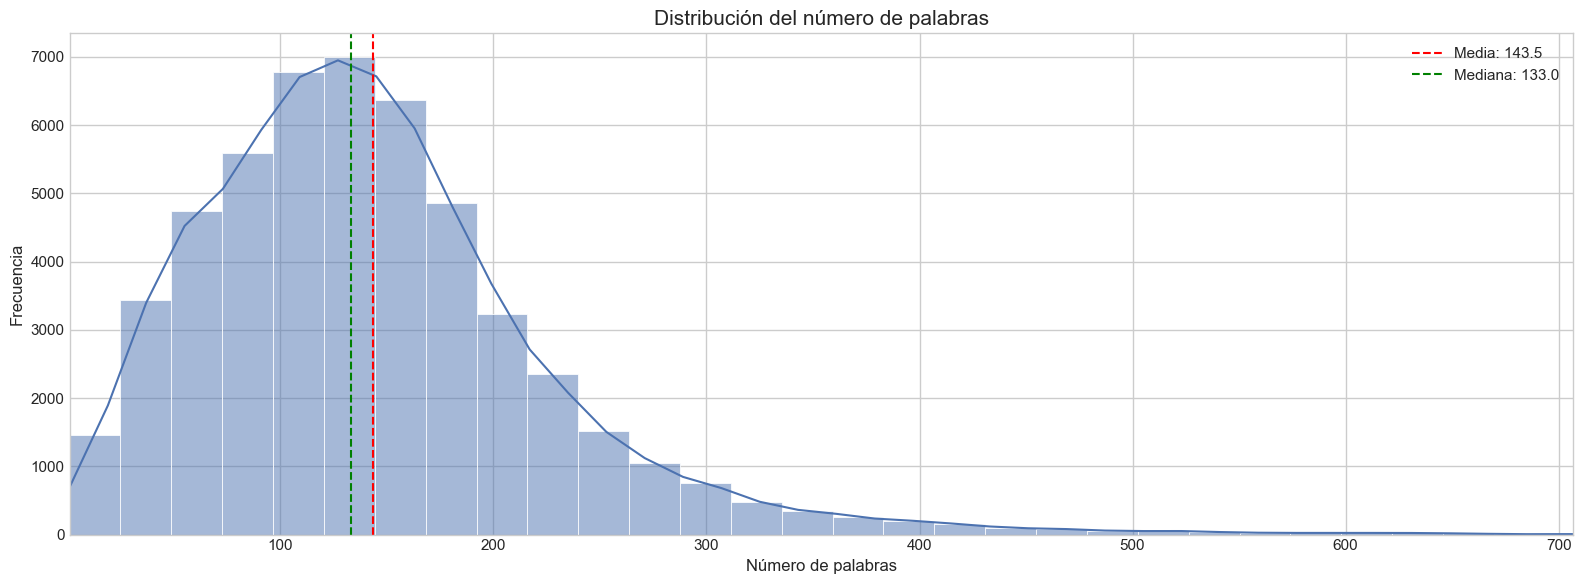

In [87]:
# Lets see how much words we have in description
# We need to know how much words is a good description
books["words_in_description"] = books["description"].str.split().str.len()

# Configuración de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Crear figura
plt.figure(figsize=(16, 6))

# Calcular percentiles para establecer límites razonables
pInit = np.percentile(books['words_in_description'].dropna(), 0)
pEnd = np.percentile(books['words_in_description'].dropna(), 99.9)

# Histograma con límites en los percentiles
sns.histplot(books['words_in_description'].dropna(), kde=True, bins=150)
plt.xlim(pInit, pEnd)  # Establecer límites en los ejes X

# Añadir línea vertical con la media y mediana
plt.axvline(books['words_in_description'].mean(), color='red', linestyle='--', 
            label=f'Media: {books["words_in_description"].mean():.1f}')
plt.axvline(books['words_in_description'].median(), color='green', linestyle='--', 
            label=f'Mediana: {books["words_in_description"].median():.1f}')

plt.title('Distribución del número de palabras', fontsize=15)
plt.xlabel('Número de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
books.loc[books["words_in_description"].between(1, 4), "description"]

2876     1949年にジョージ・オーウェルは、近未来小説としての『1984』を刊行した。\nそして20...
4463     1949年にジョージ・オーウェルは、近未来小説としての『1984』を刊行した。\n\nそして...
4582                                 The battle ends here!
4927               大ヒット作「美少女戦士セーラームーン」が新装版に! カバーはすべて描き下ろし!
5060                                          مجموعة قصصية
                               ...                        
52127    真夜中に始めよう――血と硝煙のフルコース。\n\n緑の魔女と人狼の呪い…その正体を暴いたセバ...
52176    主人の塵は、遠刺の瞳で撃ち払う――\n\n緑の魔女を巡るドイツ軍との戦いを制したセバスチャン...
52235                                      داستانهای فارسی
52301                             Tale of Mrs. Tittlemouse
52373                                 Baryshnya-krestyanka
Name: description, Length: 232, dtype: object

In [89]:
valor = books.iloc[2876]['description']
valor = books.iloc[2876]["words_in_description"]

In [90]:
books.loc[books["words_in_description"].between(15, 40), "description"]

9        Scarlett O'Hara, the beautiful, spoiled daught...
61       Twelve-year-old Jonas lives in a seemingly ide...
96       The adventures of Christopher Robin and his fr...
97       This single volume brings together all of Poe'...
114      Charlie Bucket's wonderful adventure begins wh...
                               ...                        
52326    Lars Noréns nya bok innehåller drygt femhundra...
52332    History with the nasty bits left in. Awful inf...
52358    The distant future war continues, Old man Prop...
52360    Geeder's summer at her uncle's farm is made sp...
52460    Against a seething backdrop of social unrest a...
Name: description, Length: 2802, dtype: object

In [91]:
# Data cleaning for book descriptions
# We'll focus on:
# 1. Removing books without English descriptions
# 2. Keeping only books with descriptions between 25-450 words
# 3. Truncating descriptions longer than 450 words

# First, let's create a flag for non-English descriptions
books['is_english_description'] = books['description'].notna() & (books['language'] == 'English')

# Create a flag for descriptions with appropriate length (between 25 and 450 words)
books['has_proper_description_length'] = books['words_in_description'].between(25, 450)

# Filter the dataset to keep only books with English descriptions of proper length
filtered_books = books[books['is_english_description'] & books['has_proper_description_length']].copy()

# Truncate descriptions longer than 450 words
def truncate_description(desc, max_words=450):
    if pd.isna(desc):
        return desc
    words = desc.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + '...'
    return desc

filtered_books['description'] = filtered_books['description'].apply(lambda x: truncate_description(x))

# Verify the results
print(f"Original dataset size: {len(books)}")
print(f"Filtered dataset size: {len(filtered_books)}")
print(f"Removed {len(books) - len(filtered_books)} books ({((len(books) - len(filtered_books)) / len(books) * 100):.2f}%)")

# Check the word count distribution after filtering
filtered_books['words_in_description'] = filtered_books['description'].str.split().str.len()
books = filtered_books

Original dataset size: 52425
Filtered dataset size: 40841
Removed 11584 books (22.10%)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


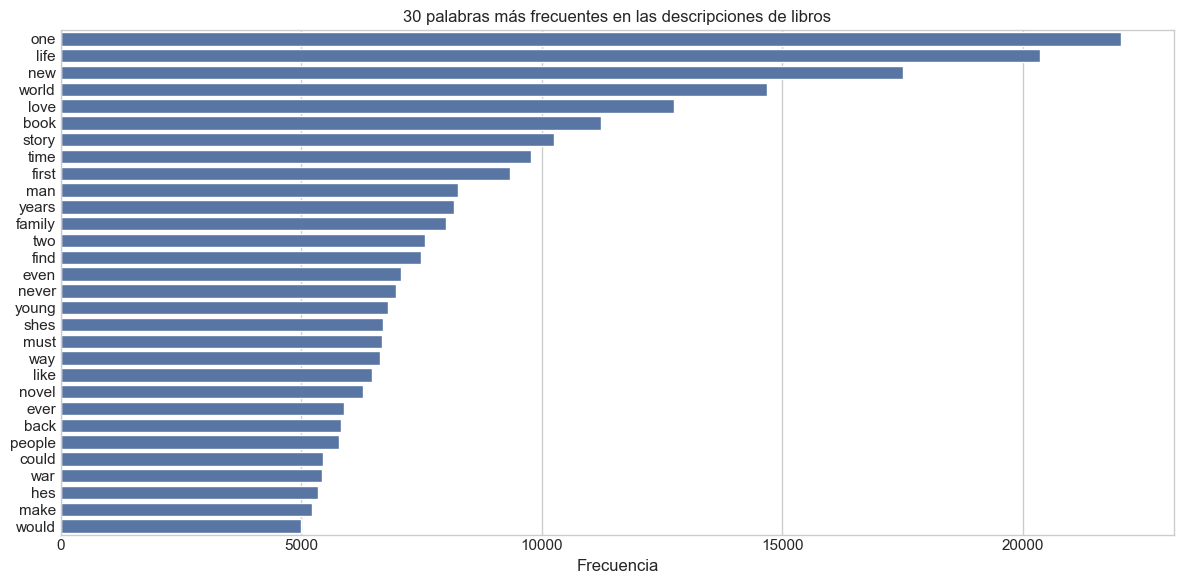

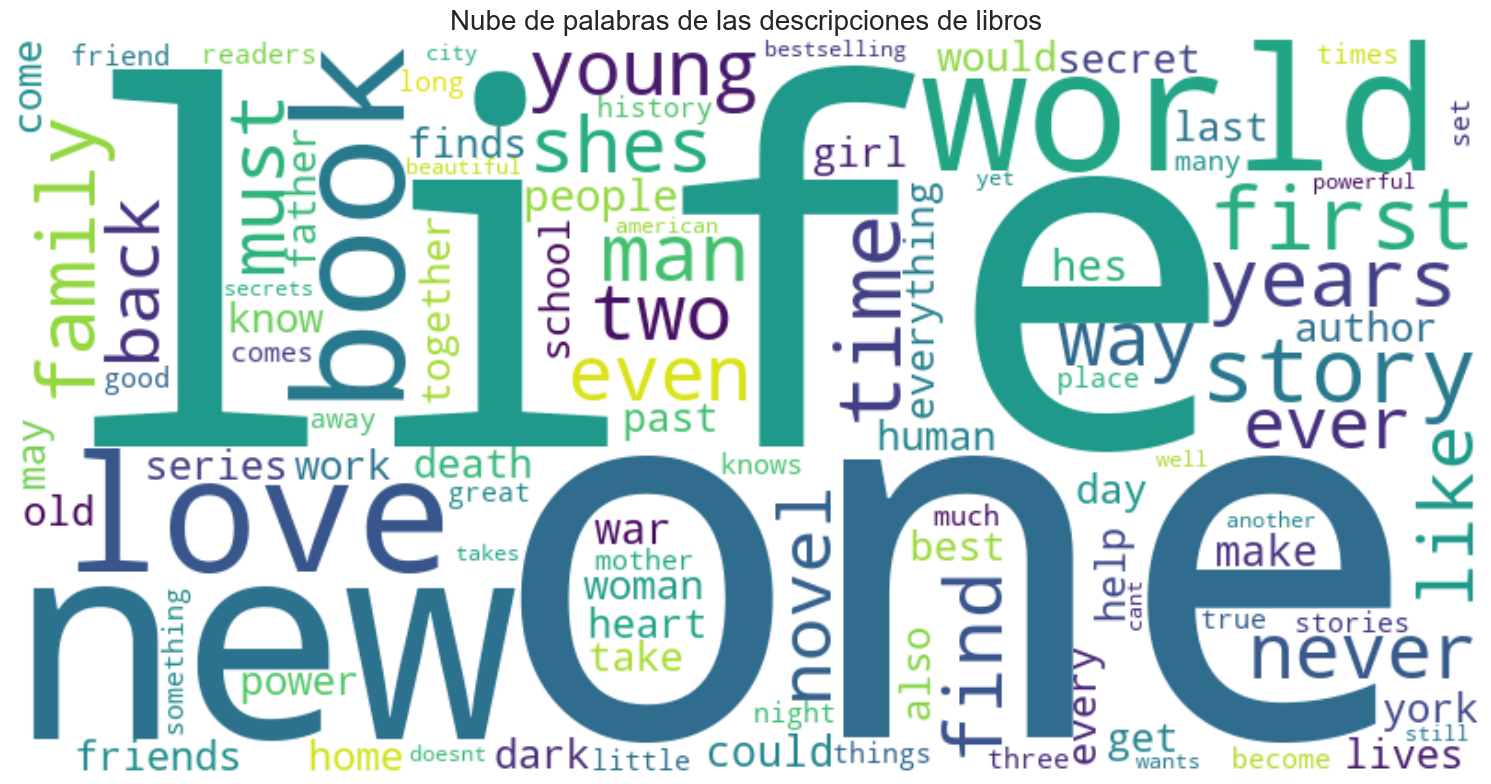

Los 5 géneros más comunes:
Fiction: 26398
Romance: 13387
Fantasy: 13153
Young Adult: 10348
Contemporary: 8943


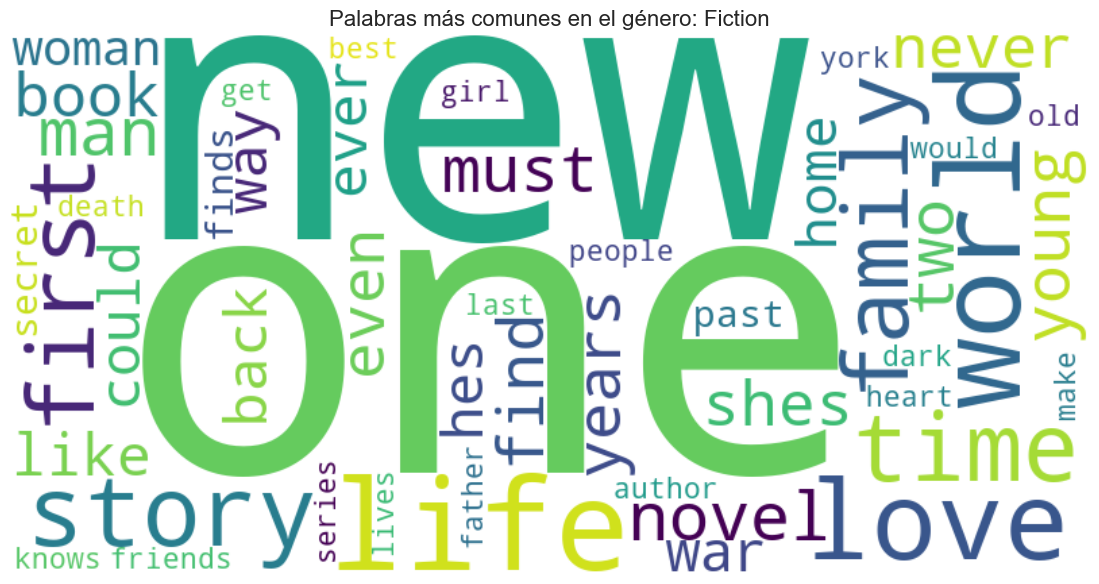

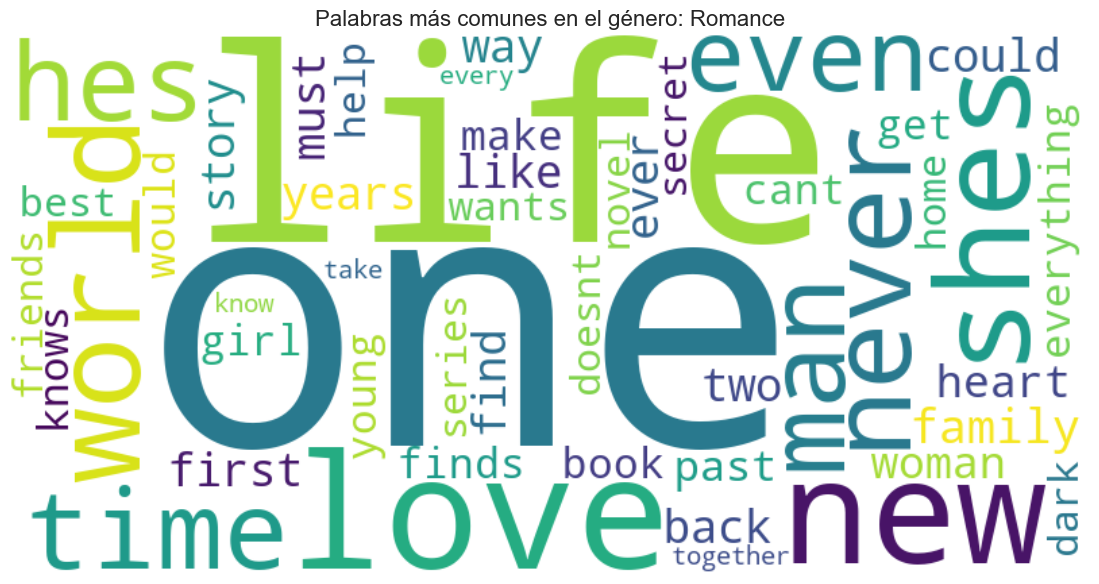

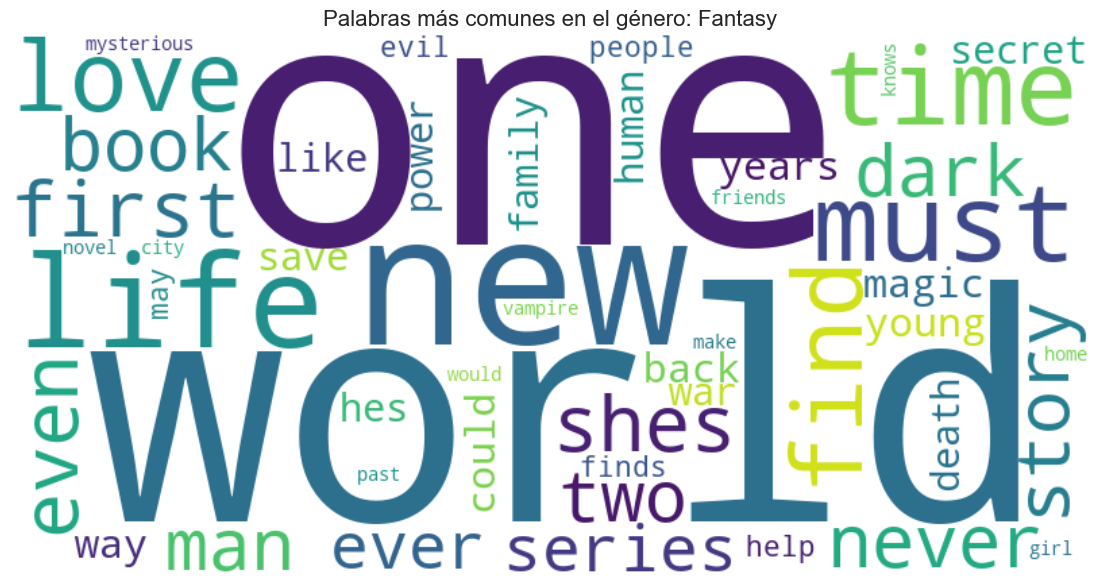

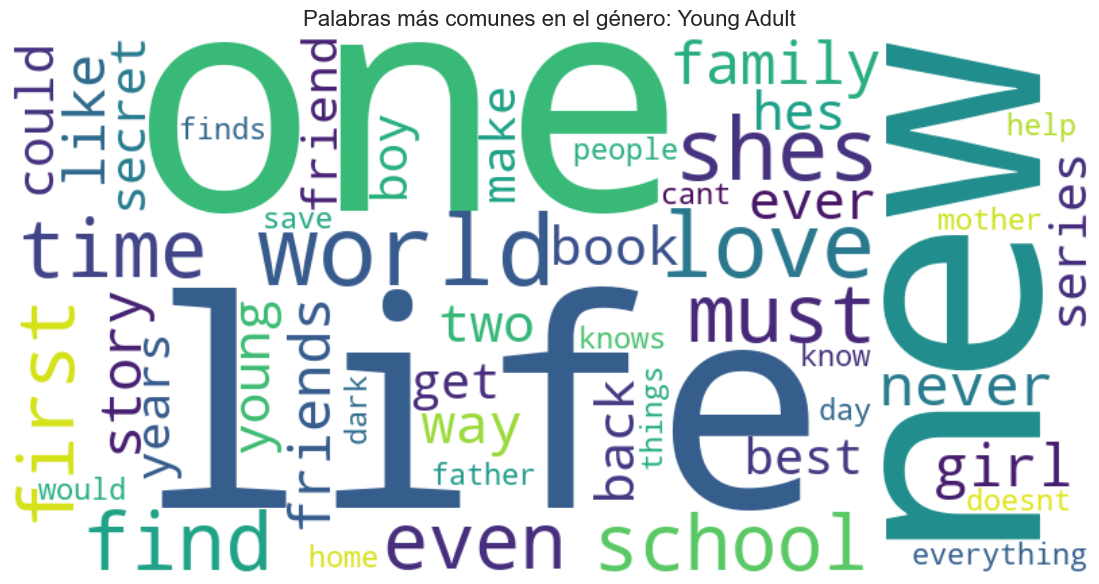

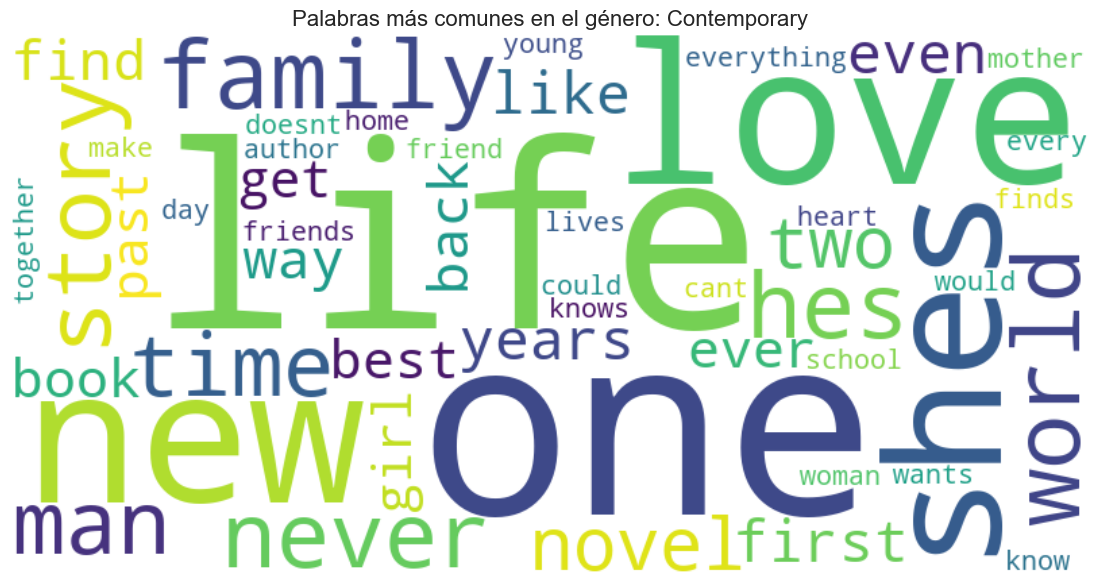

In [96]:
# Análisis de palabras más frecuentes en las descripciones
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Función para limpiar y tokenizar texto (sin usar word_tokenize)
def clean_text(text):
    if pd.isna(text):
        return []
    # Convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenizar simplemente dividiendo por espacios
    tokens = text.split()
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Procesar todas las descripciones
all_words = []
for desc in books['description']:
    all_words.extend(clean_text(desc))

# Contar frecuencia de palabras
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30)

# Visualizar las palabras más comunes
plt.figure(figsize=(12, 6))
words, counts = zip(*most_common_words)
sns.barplot(x=list(counts), y=list(words))
plt.title('30 palabras más frecuentes en las descripciones de libros')
plt.xlabel('Frecuencia')
plt.tight_layout()
plt.show()

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(dict(word_counts.most_common(100)))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las descripciones de libros', fontsize=20)
plt.tight_layout()
plt.show()

# Análisis por géneros más populares
# Asegurarse de que la columna 'genres_list' existe
if 'genres_list' not in books.columns:
    books['genres_list'] = books['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Identificar los 5 géneros más comunes
all_genres = []
for genres in books['genres_list']:
    all_genres.extend(genres)
    
top_genres = Counter(all_genres).most_common(5)
print("Los 5 géneros más comunes:")
for genre, count in top_genres:
    print(f"{genre}: {count}")

# Crear nubes de palabras para cada género principal
for genre, _ in top_genres:
    # Filtrar libros por género
    genre_books = books[books['genres_list'].apply(lambda x: genre in x)]
    
    # Procesar descripciones
    genre_words = []
    for desc in genre_books['description']:
        genre_words.extend(clean_text(desc))
    
    # Contar palabras
    genre_word_counts = Counter(genre_words)
    
    # Crear nube de palabras
    genre_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               max_words=50, contour_width=3, contour_color='steelblue')
    genre_wordcloud.generate_from_frequencies(dict(genre_word_counts.most_common(50)))
    
    plt.figure(figsize=(12, 6))
    plt.imshow(genre_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palabras más comunes en el género: {genre}', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
books.to_csv("books_clean.csv", index=False)